# Настройка ноутбука

In [3]:
import pandas as pd
import numpy as np
import datetime as dt

import scipy.stats as st

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Расширить рабочее поле ноутбука на весь экран
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Описание

**Курс:**
- [Stepik: Основы статистики – t-распределение](https://stepik.org/lesson/8081?unit=1360)
- [Stepik: Основы статистики – Сравнение двух средних. t-критерий Стьюдента](https://stepik.org/lesson/9249?unit=1829)

**Видео:**

- [Карта статистических методов - bootstrap VS t - test | Вебинар Анатолия Карпова | karpov.courses](https://www.youtube.com/watch?v=-zps6hm0nX8&ab_channel=karpov.courses)

**Статьи:**



# Концепты

- [Сайт для рассчета p-уровня значимости](https://gallery.shinyapps.io/dist_calc/)

## Сравнение двух средних. t-критерий Стьюдента

<img src="../data/img/t_criterion.png" width="1000">

### Эксперимент

In [5]:
M = 3 
sigma = 2 
N = 10_000

genpop = pd.Series(np.random.normal(M, sigma, N))

In [6]:
n = 100
size = 10_000

means = pd.DataFrame({
    'm1': [genpop.sample(n=n).mean() for i in range(size)],
    'm2': [genpop.sample(n=n).mean() for i in range(size)],
})

means['sub'] = np.round(means['m1'] - means['m2'], 2)

means.head()

,m1,m2,sub
0,3.018724,3.250822,-0.23
1,3.132862,2.994381,0.14
2,3.111973,2.971239,0.14
3,3.031685,3.156015,-0.12
4,3.050142,2.575363,0.47


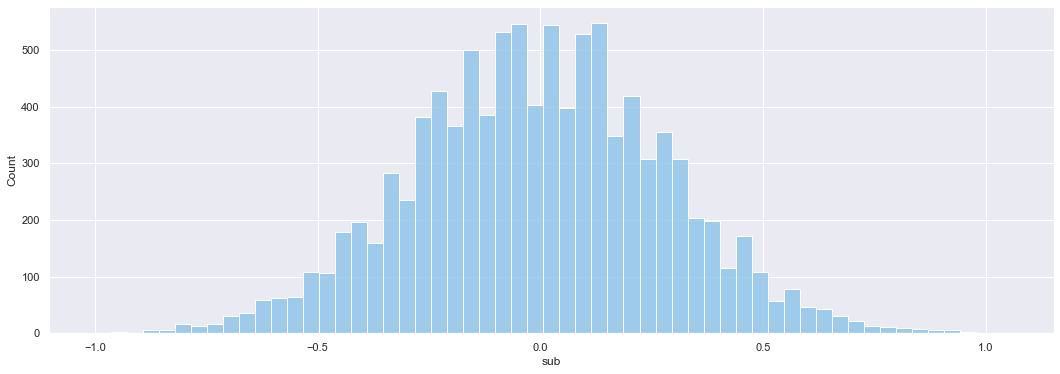

In [7]:
sns.set(rc={'figure.figsize':(18, 6)})
sns.histplot(x=means['sub'], color='#85C1E9');

    Разности средних двух выборок распределены нормально

## Примеры задач

**Пример 1.** Первая выборка — это пациенты, которых лечили препаратом А. Вторая выборка — пациенты, которых лечили препаратом Б. Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) Требуется выяснить, имеется ли значимое различие эффективности препаратов А и Б, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики.

**Пример 2.** Первая выборка — это значения некоторой характеристики состояния пациентов, записанные до лечения. Вторая выборка — это значения той же характеристики состояния тех же пациентов, записанные после лечения. Объёмы обеих выборок обязаны совпадать; более того, порядок элементов (в данном случае пациентов) в выборках также обязан совпадать. Такие выборки называются связными. Требуется выяснить, имеется ли значимое отличие в состоянии пациентов до и после лечения, или различия чисто случайны.

**Пример 3.** Первая выборка — это поля, обработанные агротехническим методом А. Вторая выборка — поля, обработанные агротехническим методом Б. Значения в выборках — это урожайность. Требуется выяснить, является ли один из методов эффективнее другого, или различия урожайности обусловлены случайными факторами.

**Пример 4.** Первая выборка — это дни, когда в супермаркете проходила промо-акция типа А (красные ценники со скидкой). Вторая выборка — дни промо-акции типа Б (каждая пятая пачка бесплатно). Значения в выборках — это показатель эффективности промо-акции (объём продаж, либо выручка в рублях). Требуется выяснить, какой из типов промо-акции более эффективен.

### Проверить равенство средних в двух выборках

In [8]:
import pandas as pd
import numpy as np

from scipy import stats as st
import matplotlib.pyplot as plt


array_1 = np.array([84.7, 105.0, 98.9, 97.9, 108.7, 81.3, 99.4, 89.4, 93.0,
                   119.3, 99.2, 99.4, 97.1, 112.4, 99.8, 94.7, 114.0, 95.1, 115.5, 111.5])
array_2 = np.array([57.2, 68.6, 104.4, 95.1, 89.9, 70.8, 83.5, 60.1, 75.7,
                   102.0, 69.0, 79.6, 68.9, 98.6, 76.0, 74.8, 56.0, 55.6, 69.4, 59.5])

# считаем количество элементов, среднее, стандартное отклонение и стандартную ошибку
df = pd.DataFrame({'Выборка 1': array_1, 'Выборка 2': array_2}).agg(['mean','std','count','sem']).transpose()
df.columns = ['mean','sd','n','se']

# рассчитываем 95% интервал отклонения среднего
p = 0.95
K = st.t.ppf((1 + p)/2, df['mean']-1)
df['interval'] = K * df['se']

df

,mean,sd,n,se,interval
Выборка 1,100.815,10.246503,20.0,2.291188,4.545754
Выборка 2,75.735,15.458102,20.0,3.456537,6.886174


#### Горизонтальные графики

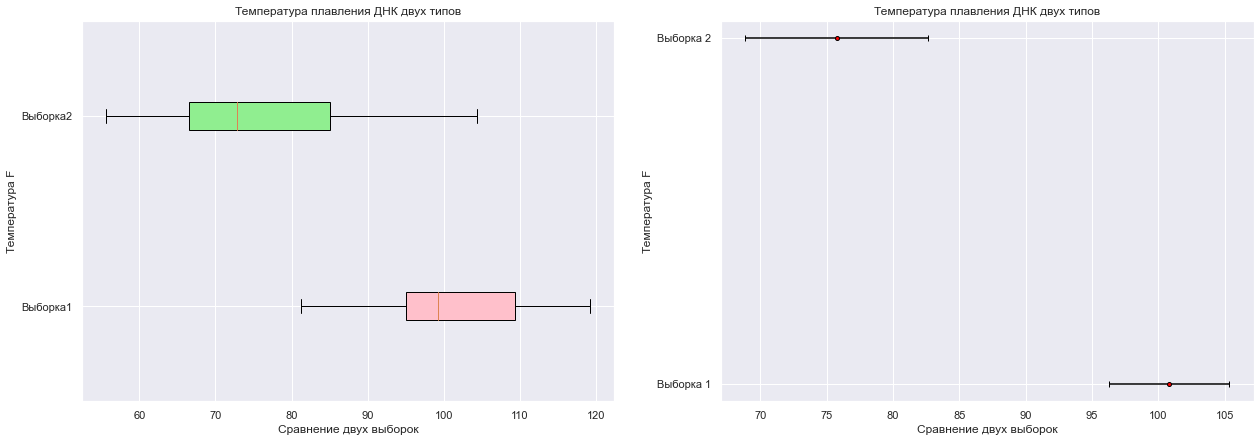

In [9]:
# строим графики, boxplot из изначальных данных array1, array2,  доверительные интервалы из датафрейма df
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(21, 7))

# график boxplot
bplot1 = ax1.boxplot(
    [array_1, array_2],
    vert=False,  # создаем горизонтальные боксы
    patch_artist=True, # для красоты заполним цветом боксы квантилей
    labels=['Выборка1', 'Выборка2']) # используется для задания значений выборок в случае с boxplot

# график доверительных интервалов
bplot2 = ax2.errorbar(
    x=df['mean'], y=df.index, xerr=df['interval'],
    color="black", capsize=3, markersize=4, mfc="red", mec="black", fmt ='o'
)

# раскрасим boxplot  
colors = ['pink', 'lightgreen']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
    
# добавим общие для каждого из графиков данные
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_title('Температура плавления ДНК двух типов')
    ax.set_xlabel('Сравнение двух выборок')
    ax.set_ylabel('Температура F')
    
plt.show()

#### Вертикальные графики

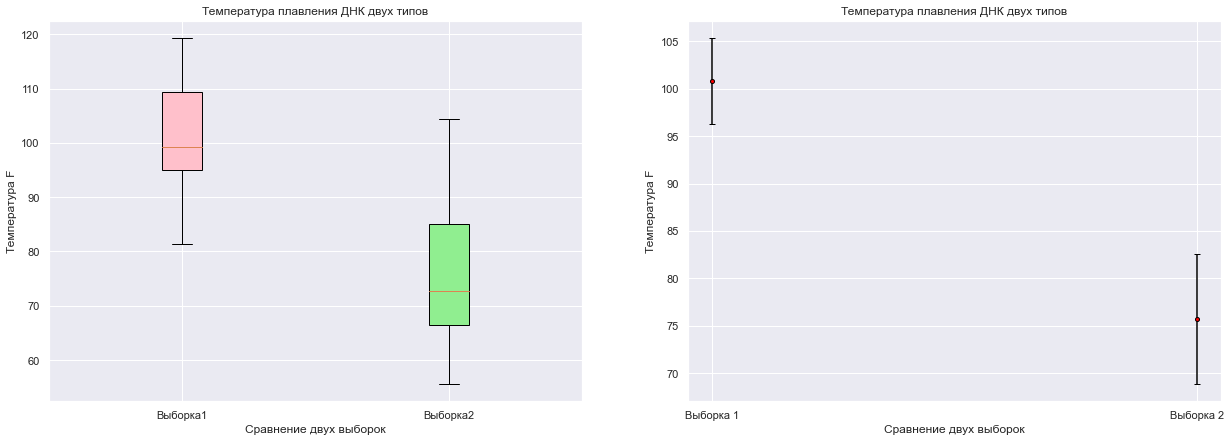

In [10]:
# строим графики, boxplot из изначальных данных array1, array2,  доверительные интервалы из датафрейма df
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(21, 7))

# график boxplot
bplot1 = ax1.boxplot(
    [array_1, array_2],
    vert=True,  # создаем вертикальные боксы
    patch_artist=True, # для красоты заполним цветом боксы квантилей
    labels=['Выборка1', 'Выборка2']) # используется для задания значений выборок в случае с boxplot

# график доверительных интервалов
bplot2 = ax2.errorbar(
    x=df.index, y=df['mean'], yerr=df['interval'],
    color="black", capsize=3, markersize=4, mfc="red", mec="black", fmt ='o'
)

# раскрасим boxplot  
colors = ['pink', 'lightgreen']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
    
# добавим общие для каждого из графиков данные
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_title('Температура плавления ДНК двух типов')
    ax.set_xlabel('Сравнение двух выборок')
    ax.set_ylabel('Температура F')
    
plt.show()

### Построить доверительный интервал

<img src="../data/img/DNA_exercise.png" width="1000">

In [11]:
from scipy import stats as st
import numpy as np

mean = 89.9
sd = 11.3
n = 20
# степень свободы
degf = n - 1
# 95% доверительный интервал
p = 0.95
alpha = 1-p
# стандартная ошибка
se = sd/np.sqrt(n)

# ppf - Percent point function
# делим на два, так как по умолчанию функция считает для одного конца, а нам надо для двух
t_value = st.t(degf).ppf(1-(alpha/2))

# доверительный интервал 
сonfidence_interval = (mean - t_value*se, mean + t_value*se)
print('[%.2f; %.2f]' % сonfidence_interval)

[84.61; 95.19]


#### [Задача на рассчет 95% доверительного интервала](https://stepik.org/lesson/9249/step/12?unit=1829)

In [12]:
from scipy import stats
from math import sqrt

mean = 89.9
sd = 11.3
n = 20
# степень свободы
df = n - 1
# 95% доверительный интервал
p = 0.95
alpha = 1-p
# стандартная ошибка
se = sd/sqrt(n)

# ppf - Percent point function
# делим на два, так как по умолчанию функция считает для одного конца, а нам надо для двух
t_value = stats.t(df).ppf(1-(alpha/2))

# доверительный интервал 
сonfidence_interval = (mean-t_value*se, mean+t_value*se)
print('[%.2f; %.2f]' % сonfidence_interval)

[84.61; 95.19]


#### [Задача про премию Оскар](https://stepik.org/lesson/9249/step/13?unit=1829)

<img src="../data/img/Oscar_exercise.png" width="1000">

In [13]:
from scipy import stats as st
import numpy as np

mean_m, mean_f = 45, 34
sd_m, sd_f = 9, 10
N = 100

se = np.sqrt((sd_m ** 2)/N + (sd_f ** 2)/N)
t_value = (mean_m - mean_f)/se

p = st.t.sf(t_value, N-2)
print(f'p={p}')
if p >= 0.05:
    print('Мы НЕ можем отклонить нулевую гипотезу')
else:
    print('Мы можем отклонить нулевую гипотезу')

p=5.328933875539173e-13
Мы можем отклонить нулевую гипотезу


#### Задачи с собеседований:

- [Stratascratch: Linear Regression & T-test - Medium](https://platform.stratascratch.com/technical/2395-linear-regression-t-test/discussion)